In [2]:
import numpy as np
import pandas as pd

In [3]:
ratings_df = pd.read_csv(r"D:\AI ML DL\recommendation system\ml-latest-small\ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies_df = pd.read_csv(r"D:\AI ML DL\recommendation system\ml-latest-small\movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print("size of rating dataset",ratings_df.shape)
print("size od movie dataset",movies_df.shape)

size of rating dataset (100836, 4)
size od movie dataset (9742, 3)


In [6]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
movies_df.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [9]:
df= pd.merge(ratings_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [10]:
import datetime
from datetime import datetime, date
df['date']=pd.to_datetime(df['timestamp'])
df.head()

,userId,movieId,rating,timestamp,title,genres,date
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:00.964982703
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:00.847434962
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.106635946
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.510577970
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.305696483


In [11]:
df.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
title         9719
genres         951
date         85043
dtype: int64

Average ratings

In [13]:
avg_rating = df
avg_rating = avg_rating.groupby('title')['rating'].mean()
print("Average Rating of the movies are:")
avg_rating

Average Rating of the movies are:


title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [15]:
sorted_by_ratings=avg_rating.sort_values(ascending=False)
sorted_by_ratings

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

total number of rating for a particular moive

In [16]:
count_rating = df.groupby('title')['rating'].count()
count_rating

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, Length: 9719, dtype: int64

In [17]:
final_record = pd.DataFrame()
final_record['Average Ratings'] =avg_rating
final_record['Total Rating Count']=count_rating
final_record.head()

,Average Ratings,Total Rating Count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
final_record.columns

Index(['Average Ratings', 'Total Rating Count'], dtype='object')

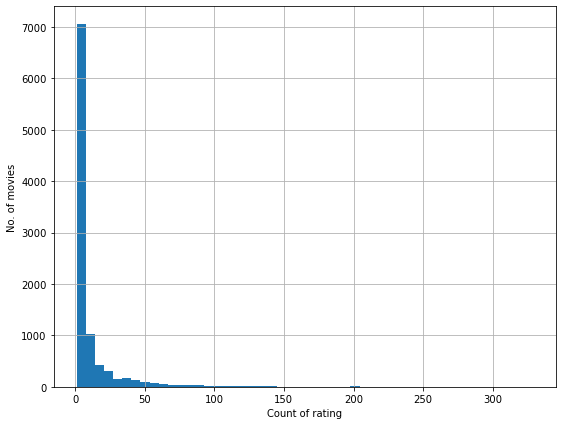

In [26]:
plt.figure(figsize=(9,7))
final_record['Total Rating Count'].hist(bins=50)
plt.ylabel("No. of movies")
plt.xlabel("Count of rating")
plt.show()


Text(0.5, 0, 'avg rating')

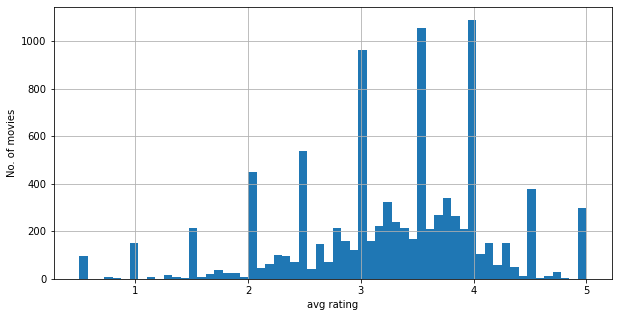

In [27]:
plt.figure(figsize=(10,5))
final_record['Average Ratings'].hist(bins=60)
plt.ylabel("No. of movies")
plt.xlabel("avg rating")


<Figure size 648x432 with 0 Axes>

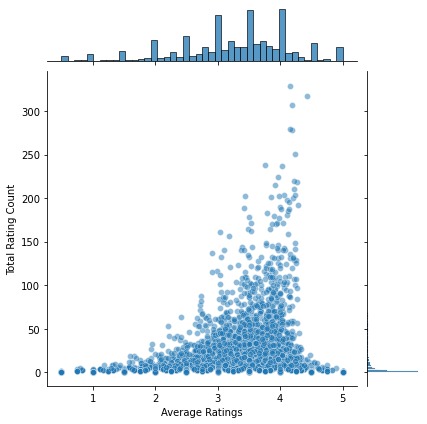

In [28]:
 plt.figure(figsize=(9,6))
 sns.jointplot(x= 'Average Ratings', y='Total Rating Count', data=final_record,alpha=0.5)

In [29]:
moviemat =df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
moviemat['Incredibles 2 (2018)']

userId
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
606   NaN
607   NaN
608   NaN
609   NaN
610   NaN
Name: Incredibles 2 (2018), Length: 610, dtype: float64

In [32]:
incredibles2_ratings = moviemat['Incredibles 2 (2018)']
incredibles2_ratings.tail()

userId
606   NaN
607   NaN
608   NaN
609   NaN
610   NaN
Name: Incredibles 2 (2018), dtype: float64

Finding similar to Incredibles 2

In [33]:
similar_to_incredibles2=moviemat.corrwith(incredibles2_ratings)
similar_to_incredibles2

C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                  NaN
'Hellboy': The Seeds of Creation (2004)     NaN
'Round Midnight (1986)                      NaN
'Salem's Lot (2004)                         NaN
'Til There Was You (1997)                   NaN
                                             ..
eXistenZ (1999)                             NaN
xXx (2002)                                  NaN
xXx: State of the Union (2005)              NaN
¡Three Amigos! (1986)                       NaN
À nous la liberté (Freedom for Us) (1931)   NaN
Length: 9719, dtype: float64

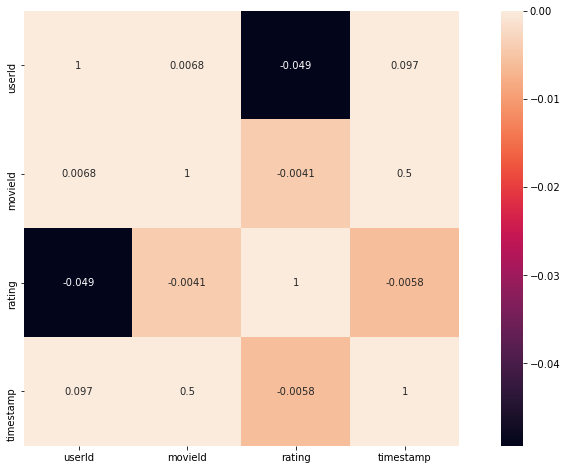

In [35]:
correlation_matrices = df.corr()
fig = plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrices, annot=True, vmax=.0,square= True)
plt.show()


In [36]:
incredibles2_correlation =pd.DataFrame(similar_to_incredibles2,columns=['correlation'])
incredibles2_correlation.dropna(inplace=True)
incredibles2_correlation.head()

,correlation
title,
Avengers: Infinity War - Part I (2018),1.0
"Beautiful Mind, A (2001)",-1.0
Blade Runner 2049 (2017),1.0
Coco (2017),1.0
"Dark Knight, The (2008)",1.0
